# Annotate Peaks

Annotate peak features such as GC content, gene features, distances from nearest genes, etc.

In [1]:
library(annotatr)
library(reshape2)
library(ggplot2)
library(patchwork)


Attaching package: ‘patchwork’


The following object is masked from ‘package:annotatr’:

    plot_annotation




In [2]:
NCLUST = 15

In [5]:
BED_DIR = "./beds/20200313_heatmap_qn_D0_CC_D2_16hr_sorted_n15/"

## Genes

In [ ]:
annotations = build_annotations(genome = 'hg38', annotations = c('hg38_basicgenes', 
                                                                 'hg38_genes_intergenic',
                                                                 'hg38_genes_intronexonboundaries'))

In [6]:
annotated = list()

for (i in seq(1,NCLUST)) {
    peaks = read.table(sprintf("%s/idx%d.bed", BED_DIR, i))
    colnames(peaks) = c("chr", "start", "end")
    peaks = makeGRangesFromDataFrame(peaks)
    
    dm_annotated = annotate_regions(
    regions = peaks,
    annotations = annotations,
    ignore.strand = TRUE,
    quiet = TRUE)
    
    dm_annsum = summarize_annotations(
    annotated_regions = dm_annotated,
    quiet = TRUE)
    
    annotated[[i]] = dm_annsum
    }

In [7]:
# specific to type of annotation, this one for gene level annotation
annotated_df = data.frame(annotated[[1]])
annotated_df = annotated_df[order(annotated_df$annot.type), ] # sort by rowname for ease
rownames(annotated_df) = annotated_df$annot.type
annotated_df$annot.type = NULL
colnames(annotated_df) = "cluster1"

for (i in seq(2,NCLUST)) {
    cur_df = annotated[[i]]
    rownames(cur_df) = cur_df$annot.type
    annotated_df[, sprintf("cluster%d", i)] = cur_df[rownames(annotated_df), "n"]
}

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”


In [8]:
# rename rows
rownames(annotated_df) = lapply(strsplit(rownames(annotated_df), "_"), "[[", 3)

# get percentage
annotated_df = 100*t(t(annotated_df)/colSums(annotated_df))

annotated_df

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11,cluster12,cluster13,cluster14,cluster15
1to5kb,14.112189,14.233064,9.823415,12.540496,11.975236,10.490429,11.020127,9.2113228,10.224052,11.0842391,9.366484,7.9434769,10.3080927,5.5344233,8.143091
3UTRs,1.941191,2.369011,2.244628,1.544975,2.591522,2.134508,2.609556,2.6597828,1.666028,0.9615665,1.919599,1.5904399,1.6221778,0.8875542,1.422720
5UTRs,5.568655,4.236483,1.467316,8.797450,2.328021,1.645350,1.733705,0.5910628,1.204519,14.3069437,1.632624,0.4390428,0.8564857,0.7696585,1.411797
exons,12.656614,12.308598,8.525080,14.917976,10.250966,7.830764,8.842497,6.4767670,6.328993,17.4771992,7.606048,4.7160759,5.7381514,4.4911578,6.780448
intergenic,10.670813,11.658878,23.843186,8.581902,18.391363,20.841098,19.067758,22.4247819,22.529682,4.9622658,23.478911,26.9676969,23.4186793,40.1957513,28.585472
intronexonboundaries,9.851256,9.502641,7.057763,10.950347,8.411574,6.441640,7.438735,5.6364607,5.348525,12.4857950,6.248342,4.3439072,4.9724593,3.6703370,5.565265
introns,32.519724,33.855770,41.738249,28.390361,38.386758,44.159749,42.811722,49.1401104,47.778629,21.4575017,44.565558,51.0627163,48.9589008,41.2857302,43.432551
promoters,12.679557,11.835556,5.300363,14.276495,7.664560,6.456463,6.475899,3.8597116,4.919571,17.2644891,5.182434,2.9366441,4.1250530,3.1653876,4.658656


In [9]:
head(melt(annotated_df))

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,1to5kb,cluster1,14.112189
2,3UTRs,cluster1,1.941191
3,5UTRs,cluster1,5.568655
4,exons,cluster1,12.656614
5,intergenic,cluster1,10.670813
6,intronexonboundaries,cluster1,9.851256


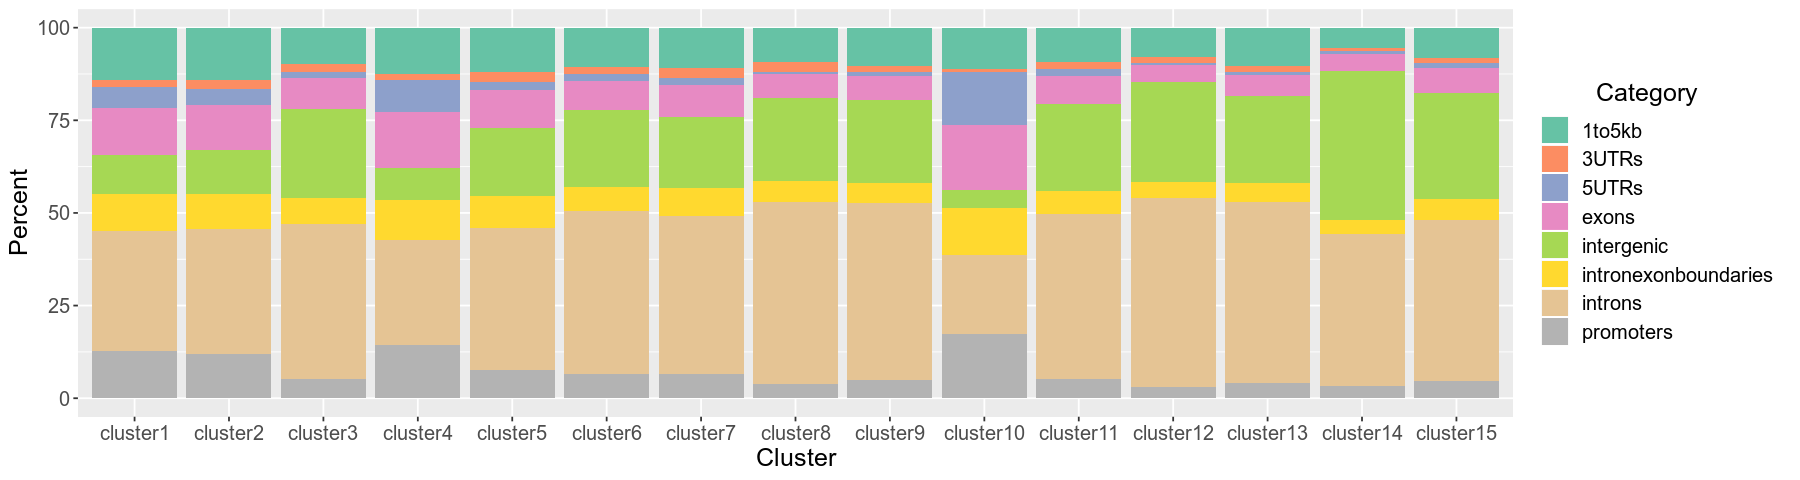

In [10]:
options(repr.plot.width = 15, repr.plot.height = 4)

ggplot(data=melt(annotated_df), aes(x=factor(Var2, levels=colnames(annotated_df)),
                                    y=value, fill=Var1)) +
scale_fill_brewer(palette="Set2") +
geom_bar(stat="identity") +
ylab("Percent") +
xlab("Cluster") +
guides(fill = guide_legend(ncol=1, title="Category", pos="center")) +
theme(legend.title.align=0.4,
      text=element_text(size=15))

## CpG

In [11]:
annotations = build_annotations(genome = 'hg38', annotations = c('hg38_cpgs'))

Building CpG islands...

Building CpG shores...

Building CpG shelves...

Building inter-CpG-islands...



In [12]:
annotated = list()

for (i in seq(1,NCLUST)) {
    peaks = read.table(sprintf("%s/idx%d.bed", BED_DIR, i))
    colnames(peaks) = c("chr", "start", "end")
    peaks = makeGRangesFromDataFrame(peaks)
    
    dm_annotated = annotate_regions(
    regions = peaks,
    annotations = annotations,
    ignore.strand = TRUE,
    quiet = TRUE)
    
    dm_annsum = summarize_annotations(
    annotated_regions = dm_annotated,
    quiet = TRUE)
    
    annotated[[i]] = dm_annsum
    }

In [13]:
annotated[[1]]

annot.type,n
<chr>,<int>
hg38_cpg_inter,23349
hg38_cpg_islands,8048
hg38_cpg_shelves,1811
hg38_cpg_shores,10586


In [14]:
# specific to type of annotation, this one for CpG level annotation
annotated_df = data.frame(annotated[[1]])
annotated_df = annotated_df[order(annotated_df$annot.type), ] # sort by rowname for ease
rownames(annotated_df) = annotated_df$annot.type
annotated_df$annot.type = NULL
colnames(annotated_df) = "cluster1"

for (i in seq(2,NCLUST)) {
    cur_df = annotated[[i]]
    rownames(cur_df) = cur_df$annot.type
    annotated_df[, sprintf("cluster%d", i)] = cur_df[rownames(annotated_df), "n"]
}

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”


In [15]:
# rename rows
rownames(annotated_df) = lapply(strsplit(rownames(annotated_df), "_"), "[[", 3)

# get percentage
annotated_df = 100*t(t(annotated_df)/colSums(annotated_df))

annotated_df

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11,cluster12,cluster13,cluster14,cluster15
inter,53.31552,55.173328,84.231498,46.065068,73.430441,84.601140,82.799443,94.3787957,90.772815,30.95950,86.985439,97.3930434,92.885251,94.115207,89.934339
islands,18.37695,15.838139,4.990522,26.233708,8.677364,4.914467,5.462221,0.7344287,1.410412,37.65272,4.794498,0.1249911,0.212498,1.669518,3.656748
shelves,4.13527,4.689468,2.727378,3.258382,4.179000,2.442537,3.138057,2.2644885,2.904386,1.87583,1.933942,1.4177559,3.462931,1.296210,1.624057
shores,24.17226,24.299065,8.050602,24.442842,13.713195,8.041855,8.600279,2.6222871,4.912387,29.51195,6.286120,1.0642097,3.439320,2.919065,4.784856


In [16]:
head(melt(annotated_df))

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,inter,cluster1,53.31552
2,islands,cluster1,18.37695
3,shelves,cluster1,4.13527
4,shores,cluster1,24.17226
5,inter,cluster2,55.17333
6,islands,cluster2,15.83814


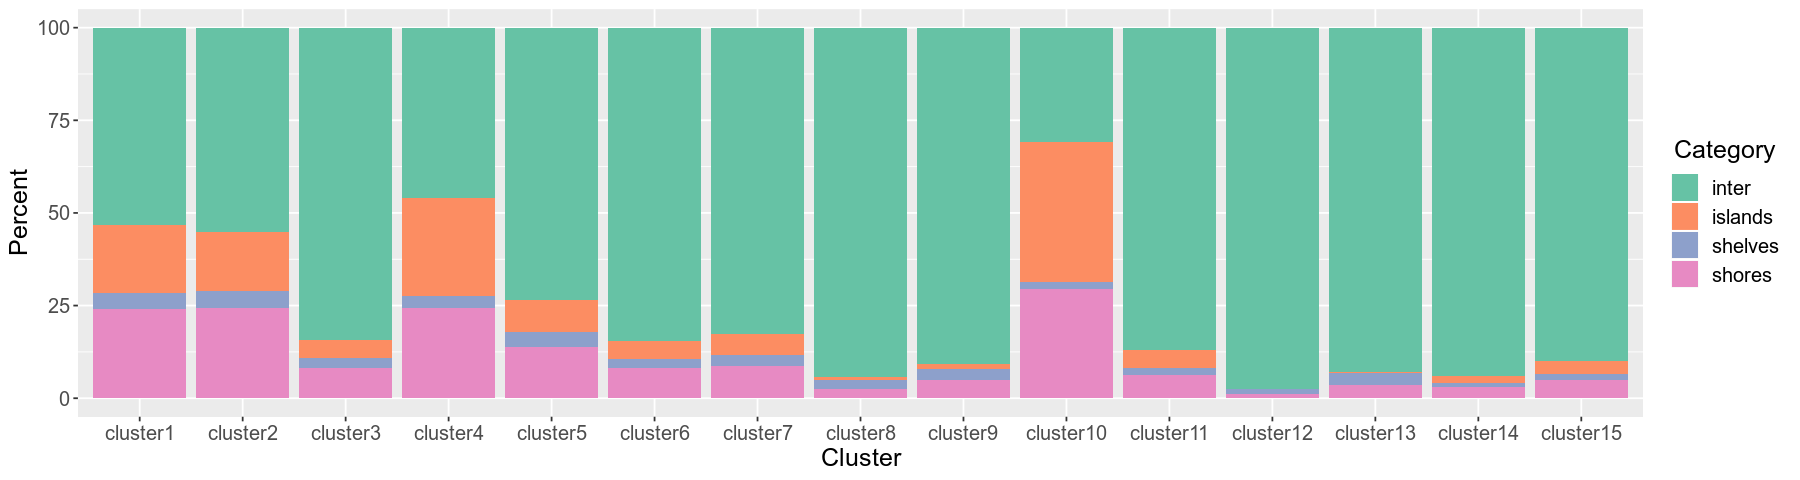

In [17]:
options(repr.plot.width = 15, repr.plot.height = 4)

ggplot(data=melt(annotated_df), aes(x=factor(Var2, levels=colnames(annotated_df)),
                                    y=value, fill=Var1)) +
scale_fill_brewer(palette="Set2") +
geom_bar(stat="identity") +
ylab("Percent") +
xlab("Cluster") +
guides(fill = guide_legend(ncol=1, title="Category", pos="center")) +
theme(legend.title.align=0.4,
      text=element_text(size=15))

## Distance From Nearest Gene

In [18]:
library(EnsDb.Hsapiens.v86)

Loading required package: ensembldb

Loading required package: AnnotationFilter


Attaching package: 'ensembldb'


The following object is masked from 'package:stats':

    filter




In [19]:
edb <- EnsDb.Hsapiens.v86

In [20]:
genes.hg38 = genes(edb, column = "gene_name", filter = GeneBiotypeFilter("protein_coding"))

In [21]:
tss.hg38 = resize(genes.hg38, width=1, fix='start')
head(tss.hg38, 2)

GRanges object with 2 ranges and 3 metadata columns:
                  seqnames    ranges strand |   gene_name         gene_id
                     <Rle> <IRanges>  <Rle> | <character>     <character>
  ENSG00000186092        1     69091      + |       OR4F5 ENSG00000186092
  ENSG00000279928        1    182393      + |  FO538757.2 ENSG00000279928
                    gene_biotype
                     <character>
  ENSG00000186092 protein_coding
  ENSG00000279928 protein_coding
  -------
  seqinfo: 287 sequences from GRCh38 genome

In [22]:
plots = list()

for (i in seq(1,NCLUST)) {
    # take mid of peaks
    peaks = read.table(sprintf("%s/idx%d.bed", BED_DIR, i))
    colnames(peaks) = c("chr", "start", "end")
    peaks$chr = sub("chr", "", peaks$chr)
    peaks_mid = as.integer((peaks$start+peaks$end)/2)
    peaks$start = peaks_mid
    peaks$end = peaks_mid+1
    peaks = makeGRangesFromDataFrame(peaks)
    
    dists = data.frame(distanceToNearest(peaks, tss.hg38, ignore.strand=TRUE))$distance
    
    plots[[i]] <- ggplot(data.frame(d=dists+1), aes(x=d)) + 
        geom_histogram(bins=50, col='black', alpha=0.5, fill='red') +
        scale_x_log10() +
        coord_cartesian(xlim=c(1,1e7)) +
        ggtitle(sprintf("Cluster %d", i)) +  
        xlab("Distance from Nearest TSS") + ylab("Count") + 
        geom_vline(xintercept = 1000, linetype="dashed") +
        theme(plot.title = element_text(hjust = 0.5))
}

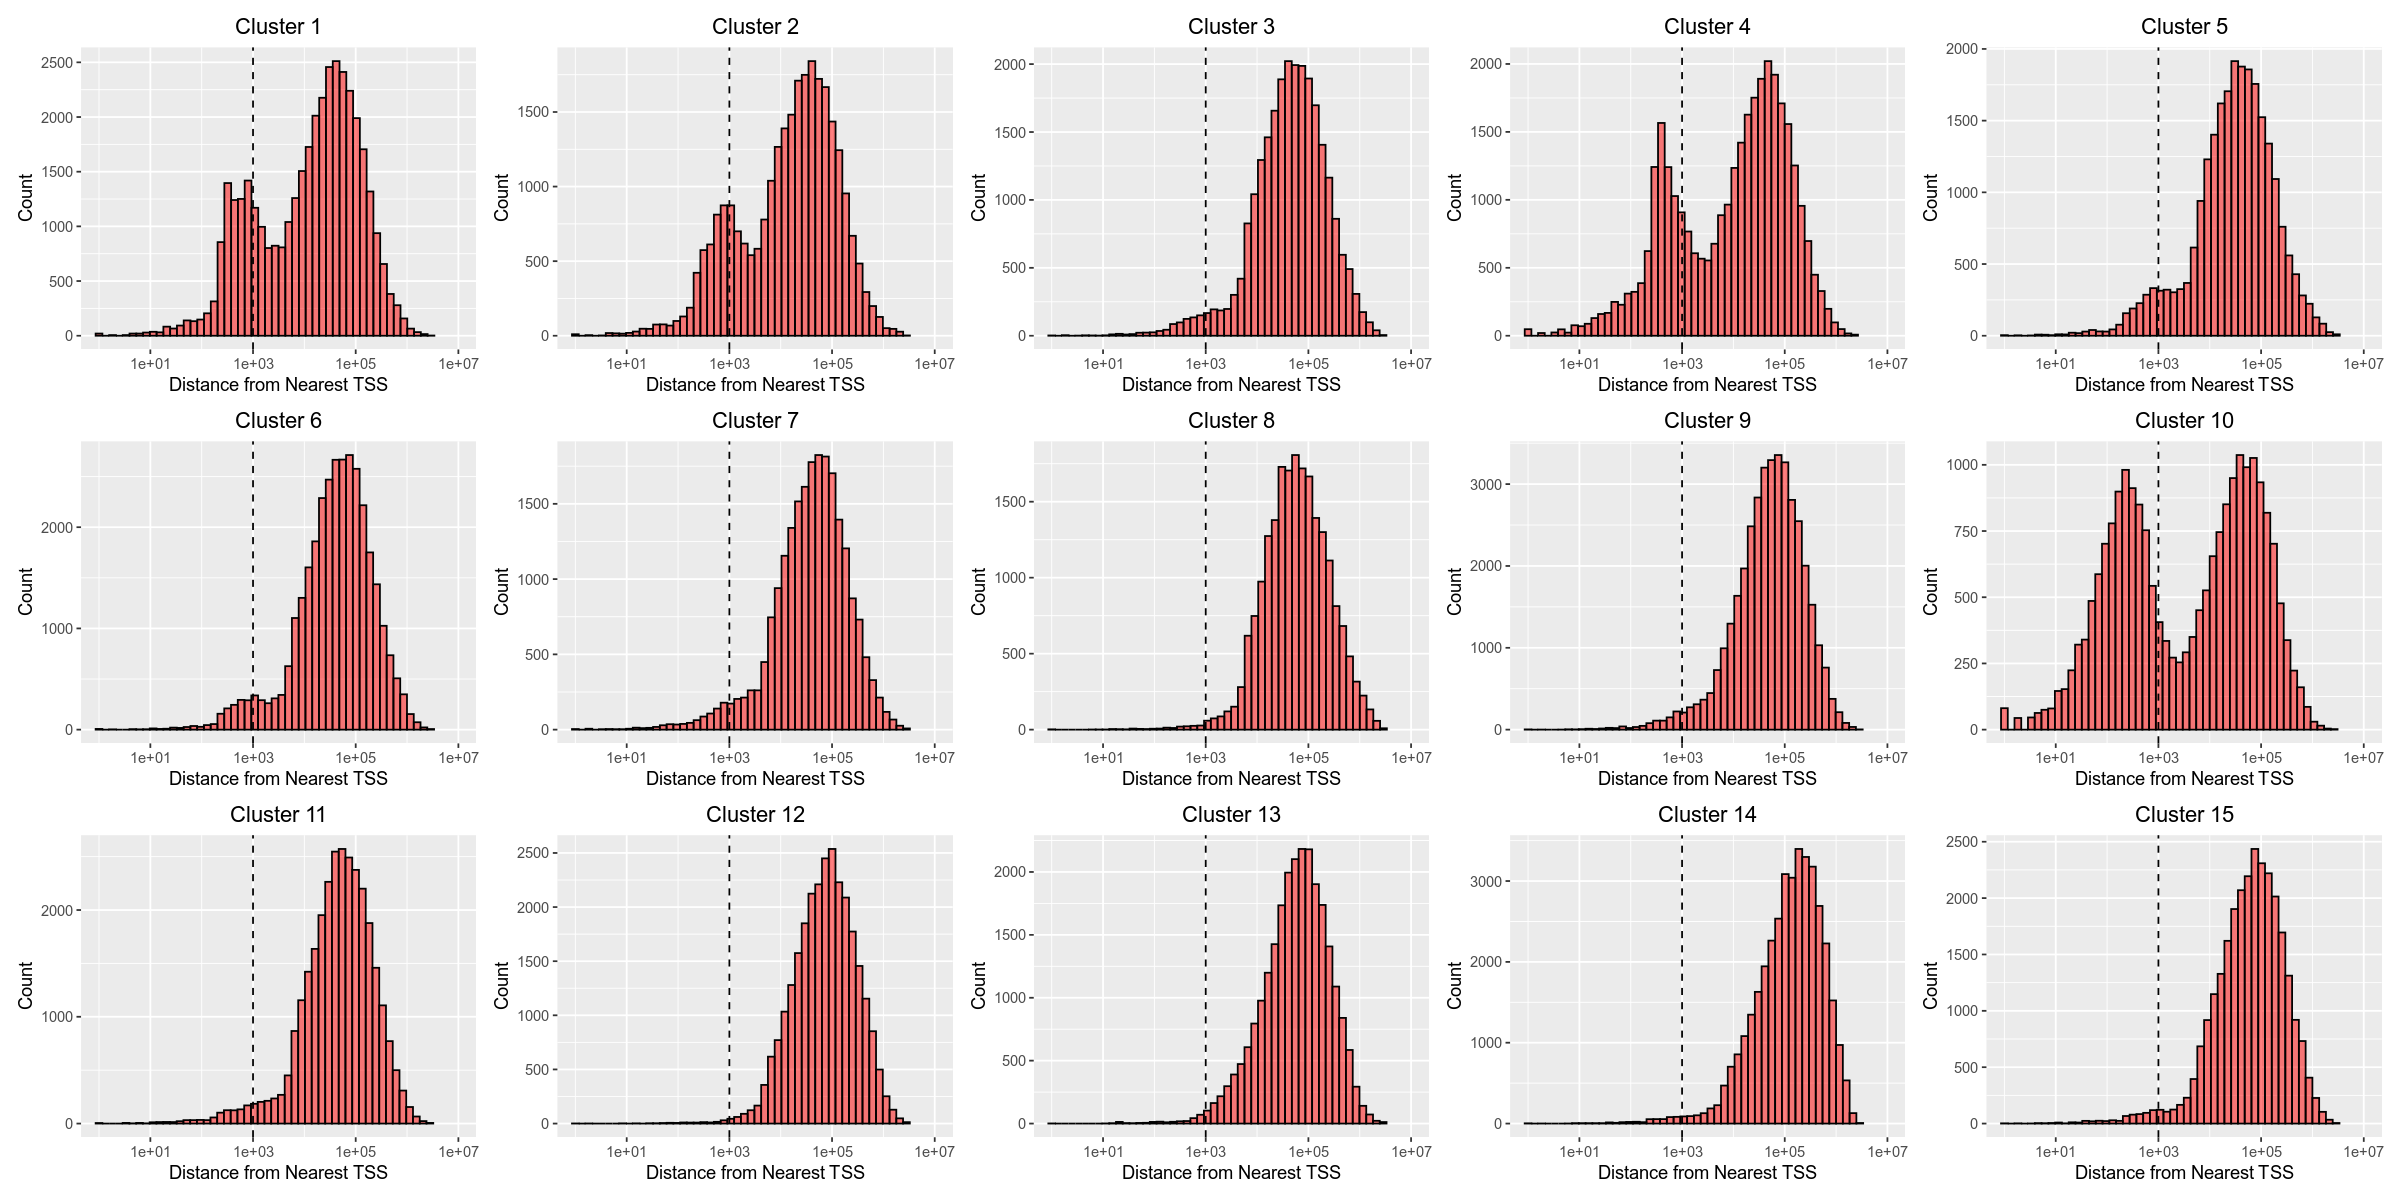

In [23]:
options(repr.plot.width = 20, repr.plot.height = 10)
wrap_plots(plots, ncol = 5)